In [27]:
library(fda.usc)
# library(tidyverse)

# Funciones auxiliares
source("../funcional/practicas/helpers.R")
# Dispositivos graficos
library(repr)
options(repr.plot.width=20, repr.plot.height=13)

In [28]:
df <- fda::growth
X <- cbind(growth$hgtm, growth$hgtf)
GRILLA <- growth$age
factores <- data.frame(
    varon=as.factor(startsWith(colnames(X) , "boy"))
)
X.fd <- fdata(
    mdata=t(X),
    argvals=GRILLA,
    names=list(main="Alturas", xlab="Edad", ylab="Altura [cm]")
)
test <- fanova.RPm(X.fd, ~ varon, factores, RP=1000)
print(test$p.FDR)

       varon
RP1000     0


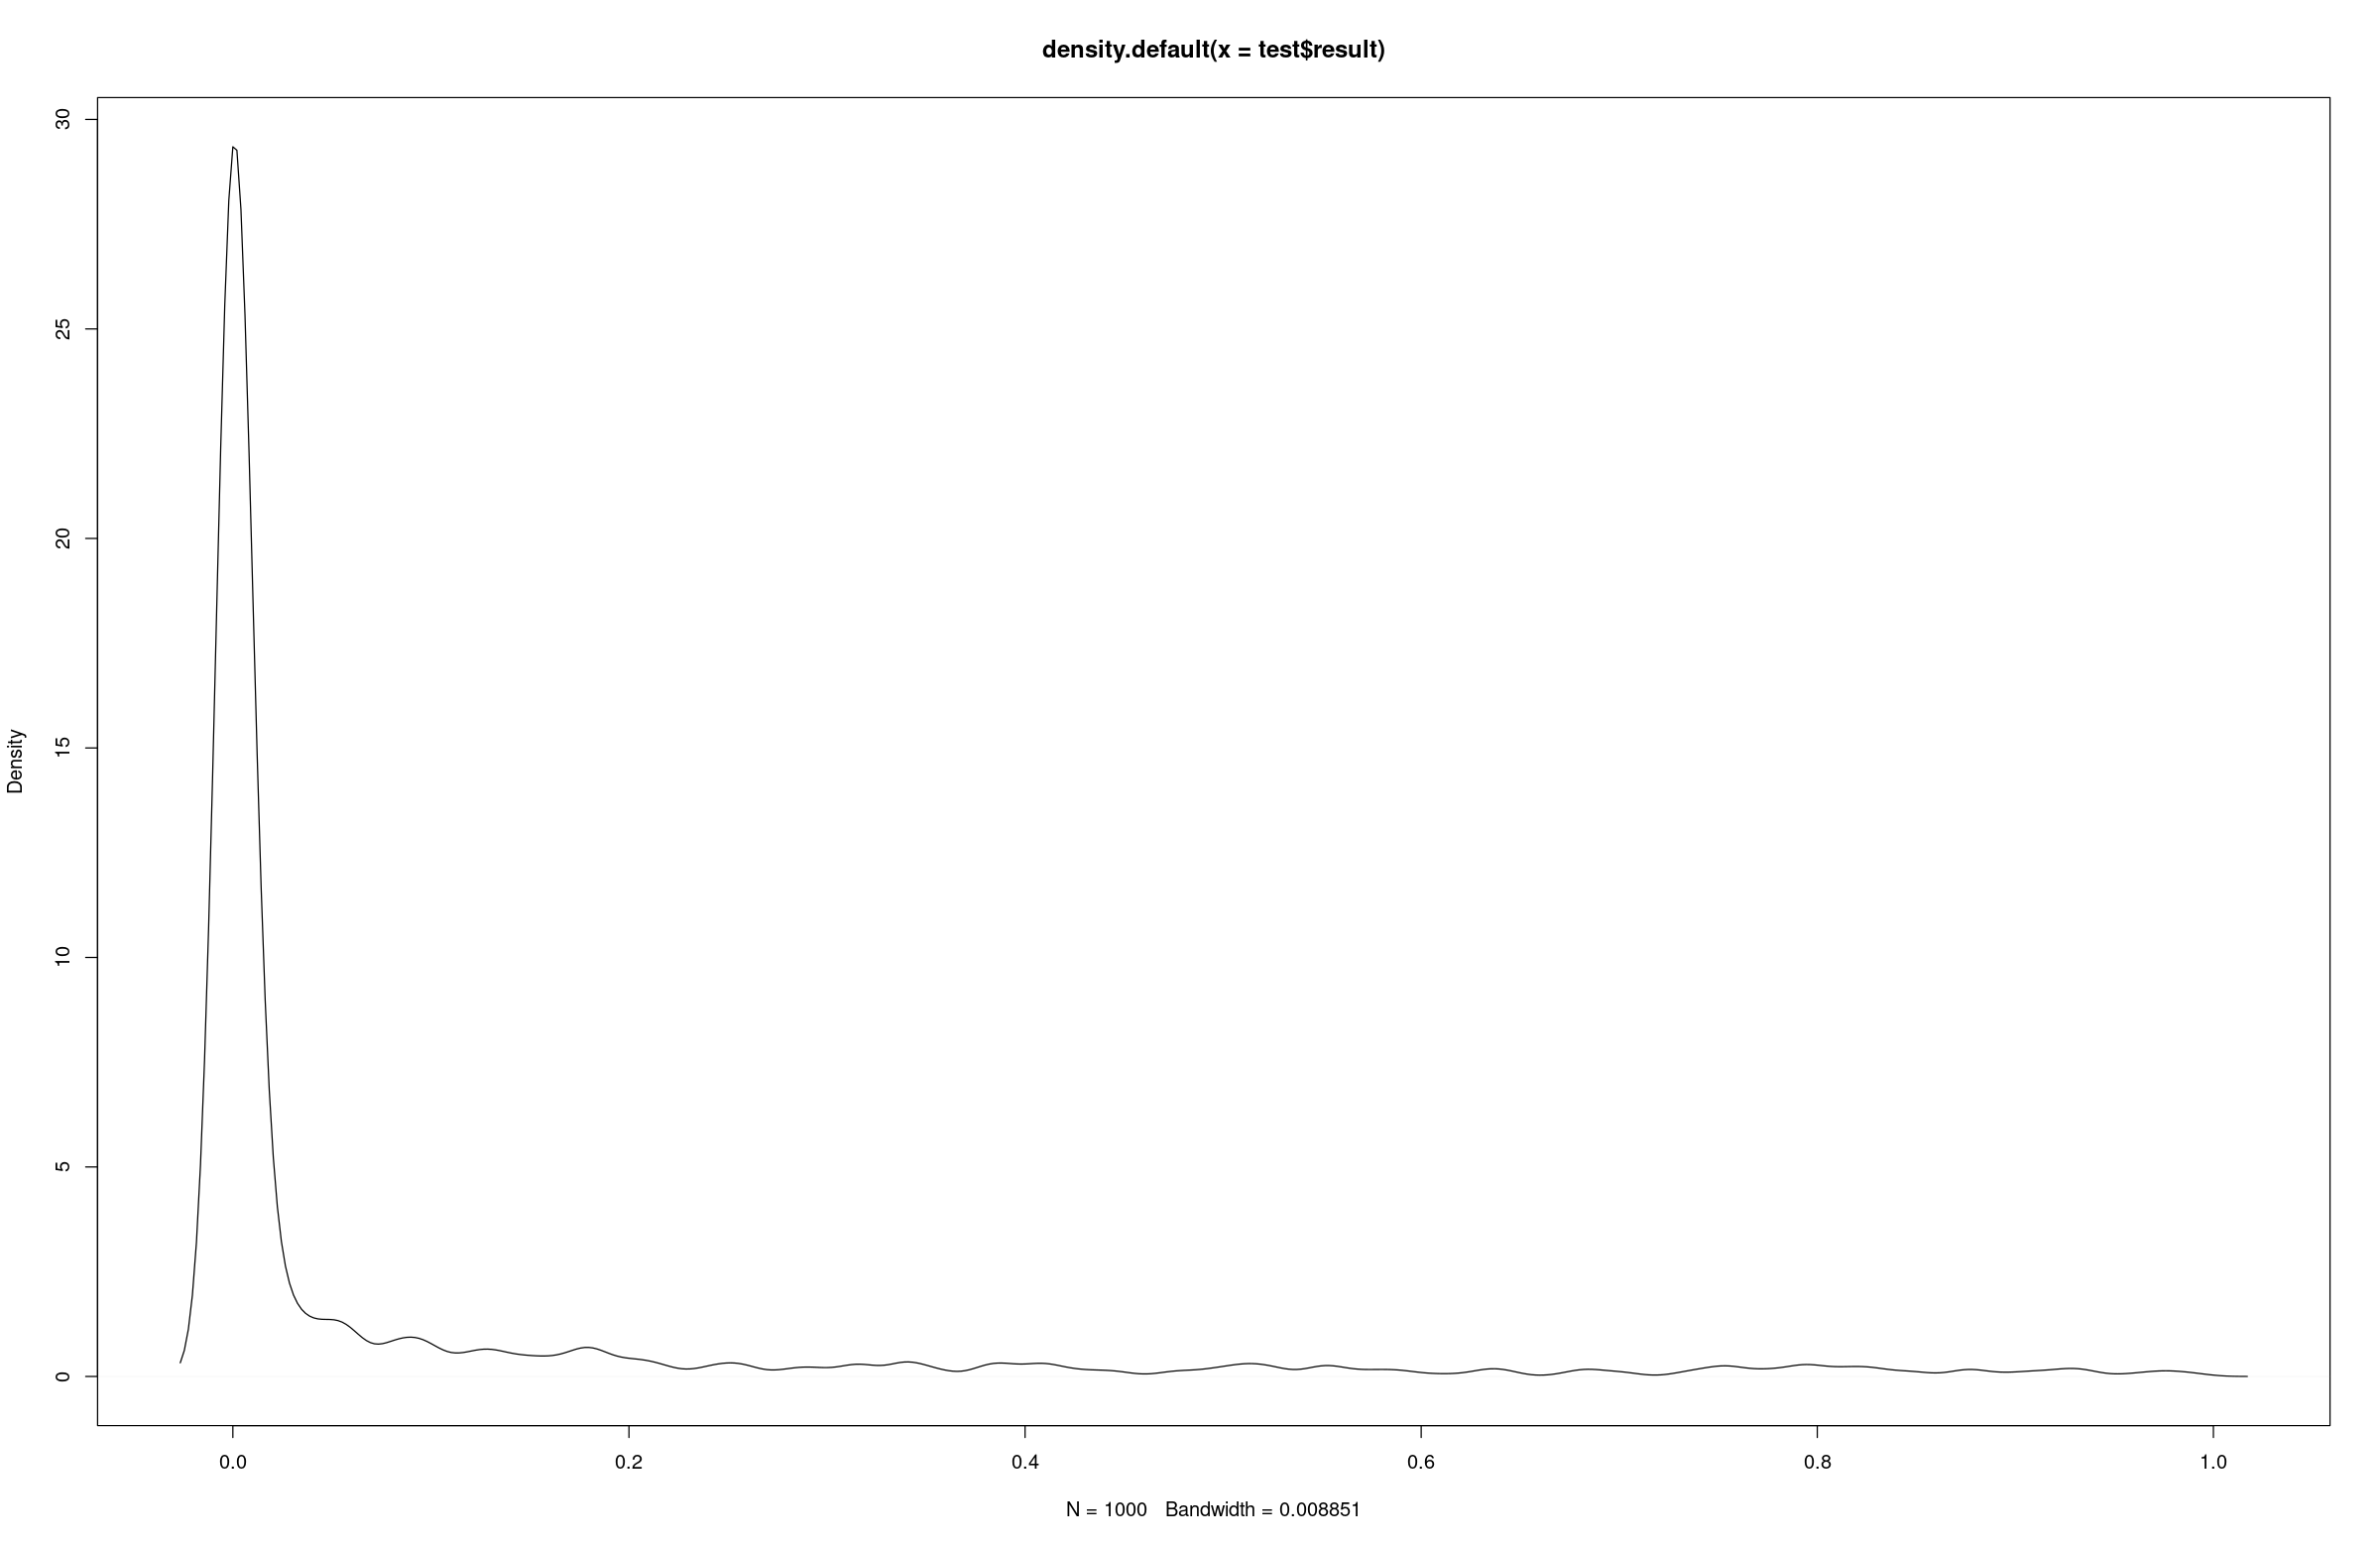

In [29]:
plot(density(test$result))

In [30]:
quantile(test$result, c(0.05, 0.5, 0.9, 0.95))

5%          50%          90%          95% 
0.0000000000 0.0001324506 0.3806929400 0.6458717511

In [31]:
factores <- data.frame(
    varon=as.factor(varon),
    control=as.factor(control)
)

In [32]:
res <- fanova.RPm(
    X.fd,
    ~ varon + control + varon * control,
    factores,
    RP=10,
    nboot = 1000,
    hetero=FALSE
)

  |======================================================================| 100%


In [33]:
for (metodo in c("Bonf", "Boot", "FDR")) {
    print(paste("Metodo:", metodo))
    print(res[[paste0("p.", metodo)]])
}

[1] "Metodo: Bonf"
            varon   control varon:control
RP10 1.367868e-24 0.8728229     0.9265501
[1] "Metodo: Boot"
     varon control varon:control
RP10     0    0.36         0.375
[1] "Metodo: FDR"
            varon   control varon:control
RP10 1.367868e-24 0.4456158     0.8700845


In [34]:
dfx <- read.csv("data/Vessel_X.txt", header=FALSE)
dfy <- read.csv("data/Vessel_Y.txt", header=FALSE)
na2o <- dfy[,1]

In [35]:
GRILLA <- 100:400

In [36]:
X <- fdata(dfx, argvals=100:400, names=list(main="Vasijas", xlab="Frecuencia", ylab="Energia"))

In [37]:
bajo_sodio <- na2o < 10
uniforme <- rbinom(180, 1, 0.5)
# For `sample` the default for size is the number of items inferred from the first argument,
# so that sample(x) generates a random permutation of the elements of x (or 1:x). 
mezcla <- sample(bajo_sodio)
factores <- data.frame(
    bajo_sodio=as.factor(bajo_sodio),
    uniforme=as.factor(uniforme),
    mezcla=as.factor(mezcla)
)

In [38]:
res <- fanova.RPm(X, ~ bajo_sodio + uniforme + mezcla, factores, RP=10, nboot = 1e3, hetero=FALSE)

  |======================================================================| 100%


In [39]:
for (metodo in c("Bonf", "Boot", "FDR")) {
    print(paste("Metodo:", metodo))
    print(res[[paste0("p.", metodo)]])
}

[1] "Metodo: Bonf"
       bajo_sodio  uniforme    mezcla
RP10 1.767382e-27 0.9409158 0.2087553
[1] "Metodo: Boot"
     bajo_sodio uniforme mezcla
RP10          0    0.365  0.108
[1] "Metodo: FDR"
       bajo_sodio  uniforme  mezcla
RP10 1.767382e-27 0.4303194 0.20617


In [40]:
dirs_aleatorias <- res$proj$data

In [46]:
proyecciones <- X$data %*% dirs_aleatorias[2,]

In [51]:
productos <- X$data %*% t(dirs_aleatorias)

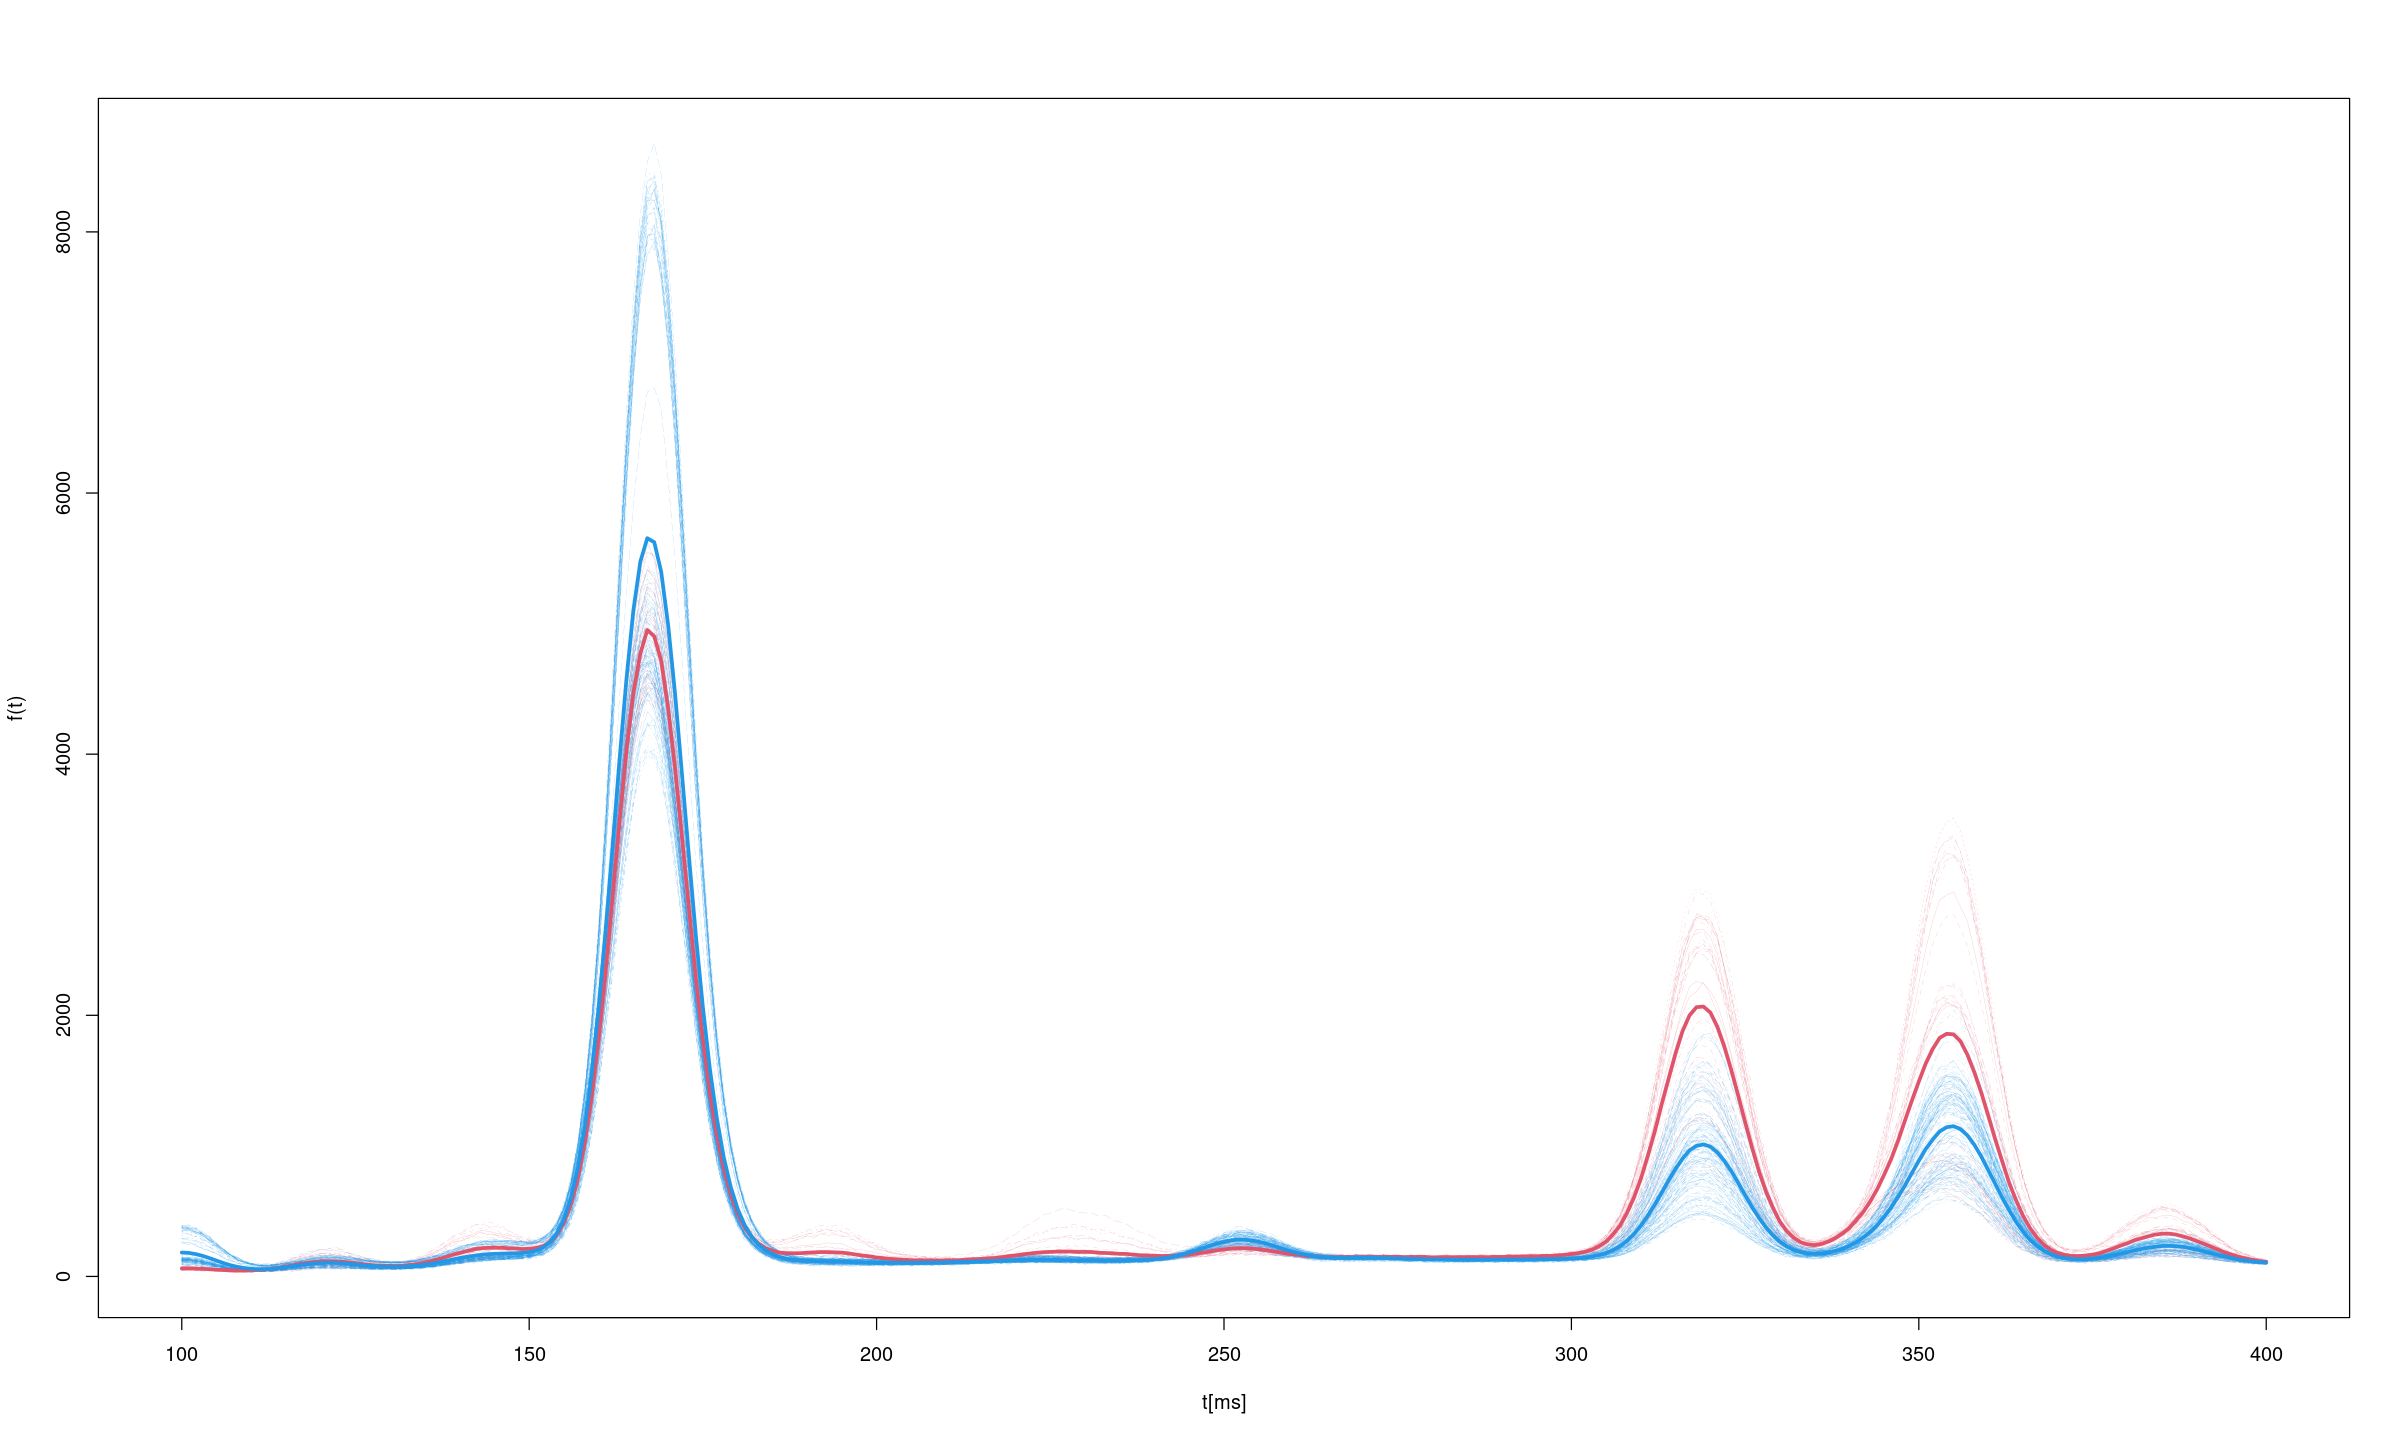

In [52]:
options(repr.plot.width=20, repr.plot.height=12)
matplot(GRILLA, t(dfx), type='l', xlab='t[ms]', ylab='f(t)', col=ifelse(bajo_sodio, 2, 4), lwd=0.1)
lines(GRILLA, get_muhat(t(dfx[bajo_sodio,])), col=2, lwd=3)
lines(GRILLA, get_muhat(t(dfx[!bajo_sodio,])), col=4, lwd=3)

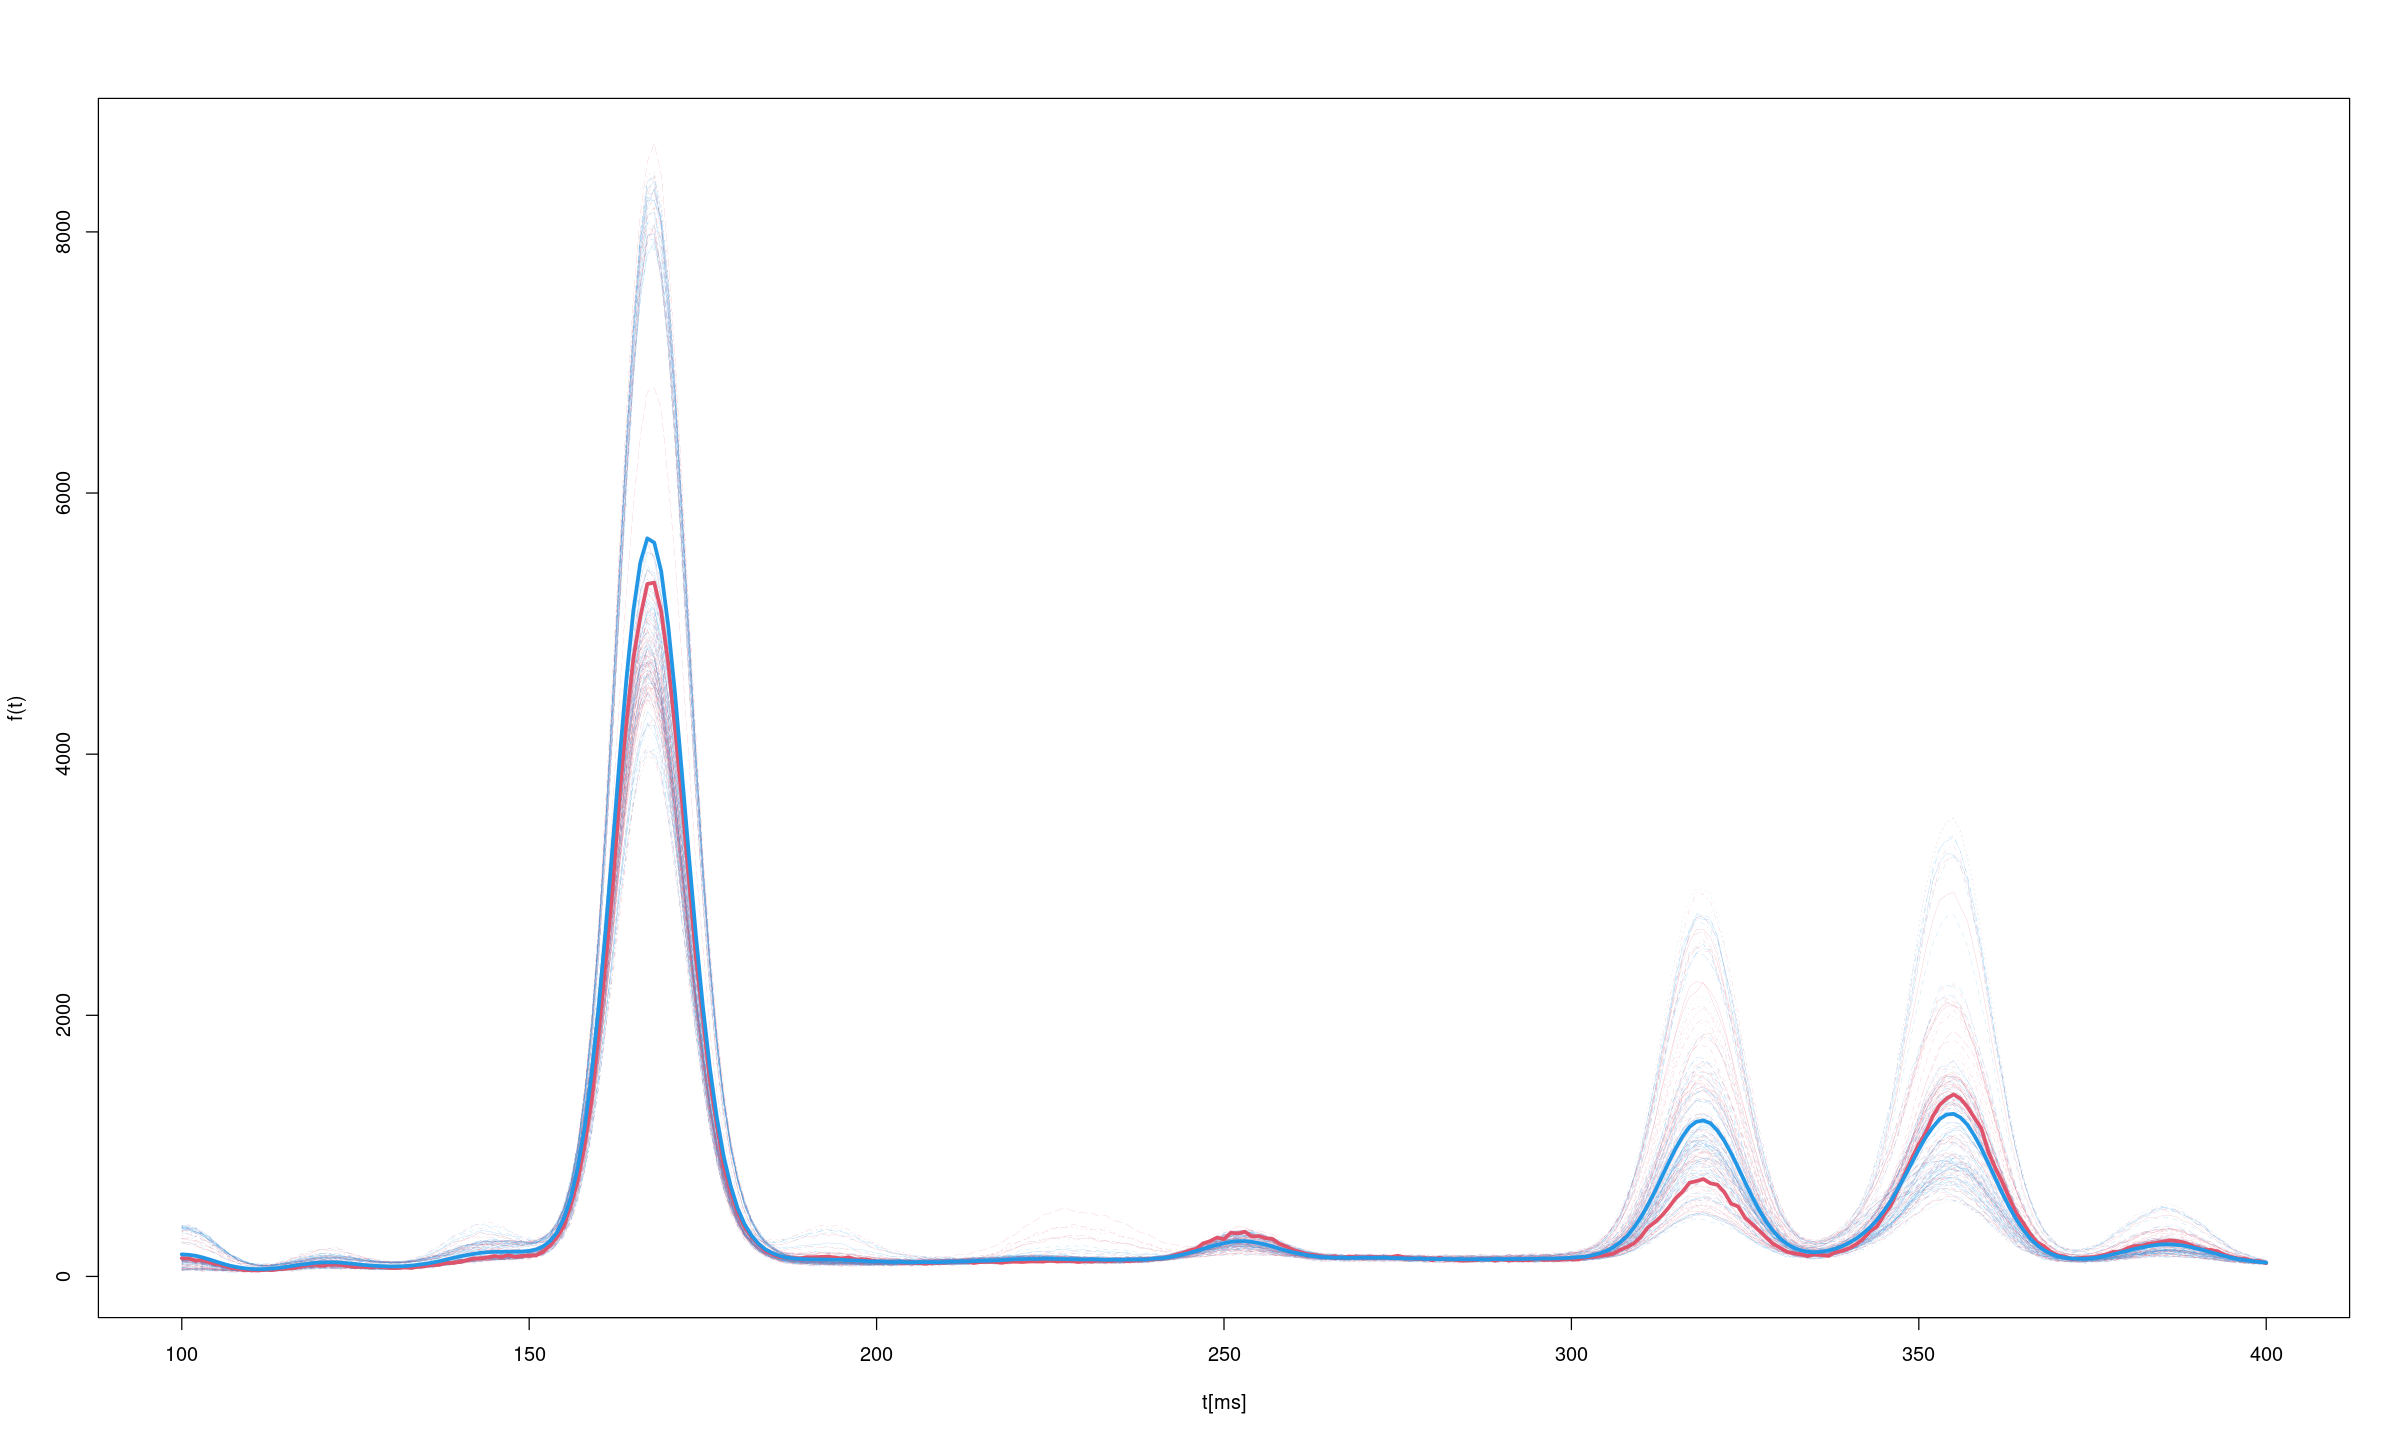

In [53]:
options(repr.plot.width=20, repr.plot.height=12)
matplot(GRILLA, t(dfx), type='l', xlab='t[ms]', ylab='f(t)', col=ifelse(uniforme, 2, 4), lwd=0.1)
lines(GRILLA, get_muhat(t(dfx[uniforme,])), col=2, lwd=3)
lines(GRILLA, get_muhat(t(dfx[!uniforme,])), col=4, lwd=3)

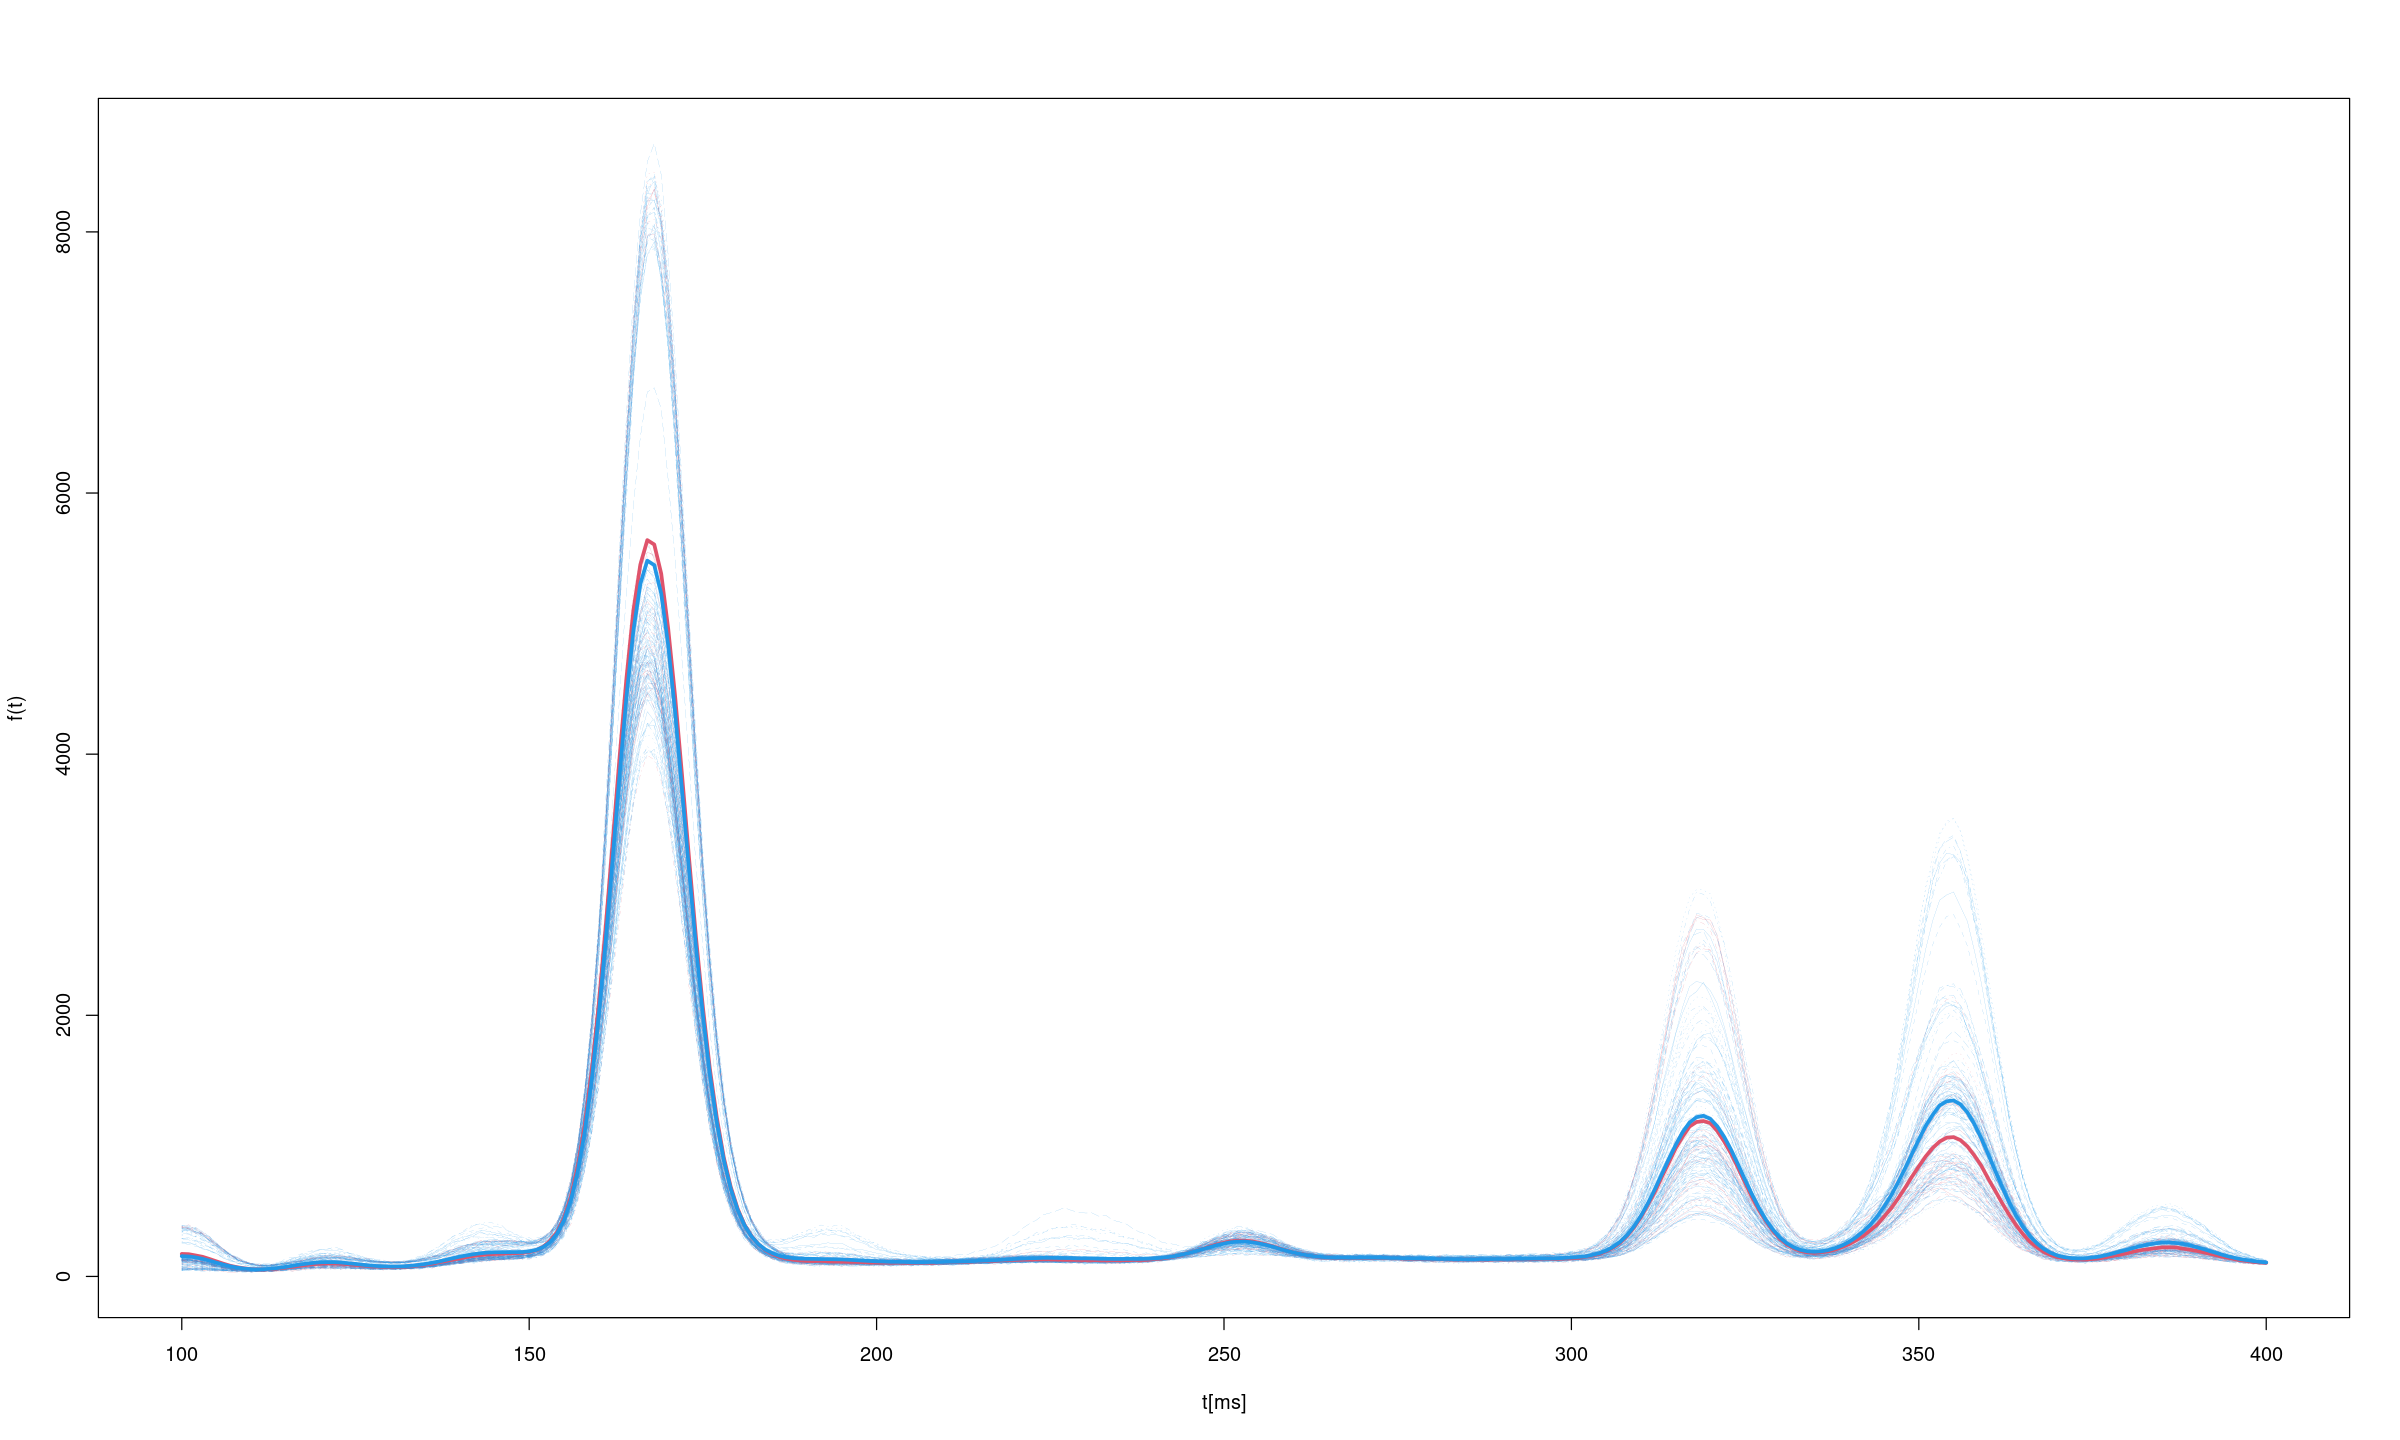

In [54]:
options(repr.plot.width=20, repr.plot.height=12)
matplot(GRILLA, t(dfx), type='l', xlab='t[ms]', ylab='f(t)', col=ifelse(mezcla, 2, 4), lwd=0.1)
lines(GRILLA, get_muhat(t(dfx[mezcla,])), col=2, lwd=3)
lines(GRILLA, get_muhat(t(dfx[!mezcla,])), col=4, lwd=3)

In [ ]:
help(fanova.RPm)